In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss

In [3]:
s.set_style("darkgrid")
m.rcParams['font.size'] = 14
m.rcParams['figure.figsize'] = (9, 5)
m.rcParams['figure.facecolor'] = '#00000000'

In [4]:
train_raw = p.read_csv('Train.csv', delimiter = ';')
train_raw

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,115996,0,19.0,6.81,Sales,2,Other,Male,Yes,Yes,...,3,High,2,0.0,3,1,NaN,0.0,0.0,0.0
15996,115997,0,56.0,7.60,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,115998,0,26.0,6.52,Human Resources,1,Other,Female,No,Yes,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,115999,0,29.0,6.11,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [5]:
train_raw[(train_raw.PerformanceRating == n.int64(4))].JobSatisfaction.value_counts()

4    1009
1    1006
2     984
3     961
Name: JobSatisfaction, dtype: int64

In [6]:
train_raw.columns

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
"s.heatmap(train_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')"

"s.heatmap(train_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')"

In [8]:
train_raw.isnull().sum(axis=0)

EmployeeID                    0
Target                        0
Age                         607
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                  49
MaritalStatus               234
MicromanagedAtWork          138
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears           333
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany              333
YearsSinceLastPromotion     333
YearsWithCurrManager        333
dtype: int64

In [9]:
train_raw.describe()

,EmployeeID,Target,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,16000.000000,16000.000000,15393.000000,16000.000000,16000.000000,16000.000000,16000.000000,15951.000000,15862.000000,1.600000e+04,...,16000.000000,16000.000000,16000.000000,16000.000000,15667.000000,16000.000000,16000.000000,15667.000000,15667.000000,15667.000000
mean,108000.500000,0.176250,38.966413,7.768878,3.001313,2.509063,2.494937,10.914175,3.001954,2.280443e+05,...,16.003000,2.493875,2.494687,2.488000,9.205464,3.004313,2.499125,4.557669,1.785792,2.017872
std,4618.946489,0.381045,12.365318,1.827135,1.410916,1.122329,1.116211,6.449444,1.413566,6.733454e+05,...,5.488681,1.116934,1.118559,1.118228,8.885191,2.003352,1.113026,5.864989,1.695834,2.441463
min,100001.000000,0.000000,18.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.017000e+03,...,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,104000.750000,0.000000,28.000000,6.660000,2.000000,2.000000,1.000000,6.000000,2.000000,3.333300e+04,...,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,108000.500000,0.000000,39.000000,7.400000,3.000000,3.000000,2.000000,9.000000,3.000000,1.250000e+05,...,16.000000,2.000000,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,112000.250000,0.000000,50.000000,8.490000,4.000000,4.000000,3.000000,15.000000,4.000000,2.416670e+05,...,21.000000,3.000000,3.000000,3.000000,15.000000,5.000000,3.000000,7.000000,3.000000,3.000000
max,116000.000000,1.000000,60.000000,18.340000,5.000000,4.000000,4.000000,30.000000,5.000000,7.916670e+06,...,25.000000,4.000000,4.000000,4.000000,39.000000,6.000000,4.000000,38.000000,5.000000,10.000000


In [10]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                16000 non-null  int64  
 1   Target                    16000 non-null  int64  
 2   Age                       15393 non-null  float64
 3   AvgDailyHours             16000 non-null  float64
 4   Department                16000 non-null  object 
 5   Education                 16000 non-null  int64  
 6   EducationField            16000 non-null  object 
 7   Gender                    15652 non-null  object 
 8   HasFlexibleTimings        15831 non-null  object 
 9   IsIndividualContributor   15675 non-null  object 
 10  JobInvolvement            16000 non-null  int64  
 11  JobRole                   15630 non-null  object 
 12  JobSatisfaction           16000 non-null  int64  
 13  LeavesTaken               15951 non-null  float64
 14  Marita

In [11]:
df = train_raw.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13554 non-null  int64  
 1   Target                    13554 non-null  int64  
 2   Age                       13554 non-null  float64
 3   AvgDailyHours             13554 non-null  float64
 4   Department                13554 non-null  object 
 5   Education                 13554 non-null  int64  
 6   EducationField            13554 non-null  object 
 7   Gender                    13554 non-null  object 
 8   HasFlexibleTimings        13554 non-null  object 
 9   IsIndividualContributor   13554 non-null  object 
 10  JobInvolvement            13554 non-null  int64  
 11  JobRole                   13554 non-null  object 
 12  JobSatisfaction           13554 non-null  int64  
 13  LeavesTaken               13554 non-null  float64
 14  Marita

<AxesSubplot:title={'center':'Number of Employees under Stress'}, xlabel='Target', ylabel='count'>

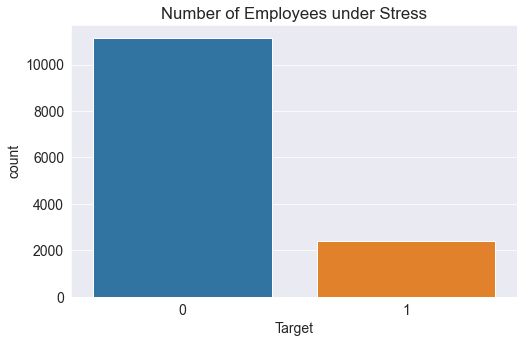

In [13]:
m.figure(figsize=(8,5))
m.title('Number of Employees under Stress')
s.countplot(x = df.Target)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Age vs Education'}, xlabel='Education', ylabel='Age'>

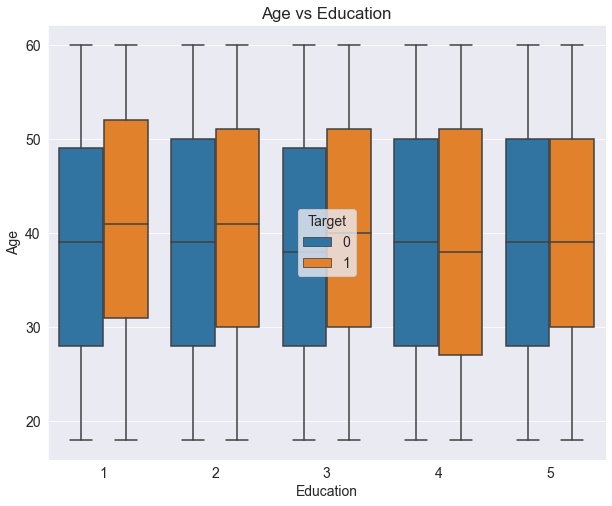

In [14]:
m.figure(figsize=(10,8))
m.title('Age vs Education')
s.boxplot(train_raw.Education, train_raw.Age, hue=train_raw.Target)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Job Satisfaction vs Education Field'}, xlabel='EducationField', ylabel='JobSatisfaction'>

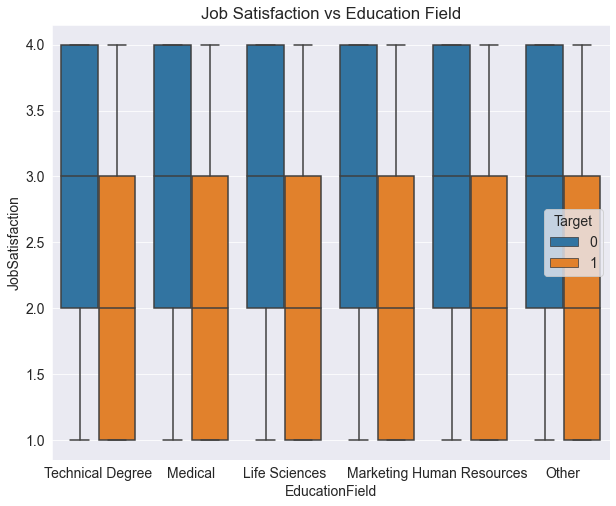

In [15]:
m.figure(figsize=(10,8))
m.title('Job Satisfaction vs Education Field')
s.boxplot(train_raw.EducationField, train_raw.JobSatisfaction, hue=train_raw.Target)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Average Daily Hours vs Has Flexible Timings'}, xlabel='HasFlexibleTimings', ylabel='AvgDailyHours'>

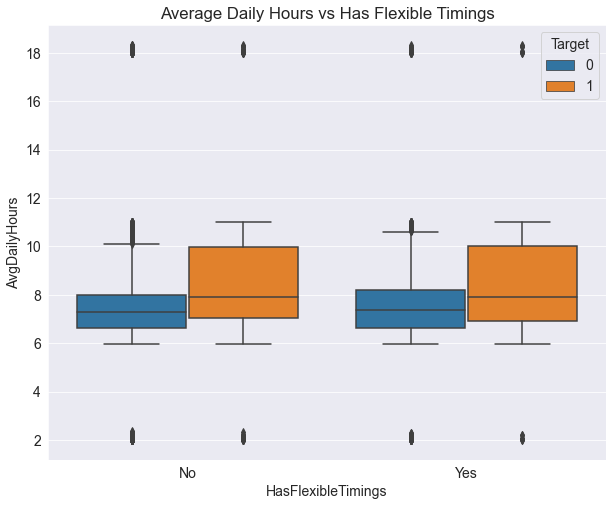

In [18]:
m.figure(figsize=(10,8))
m.title('Average Daily Hours vs Has Flexible Timings')
s.boxplot(train_raw.HasFlexibleTimings, train_raw.AvgDailyHours, hue=train_raw.Target)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

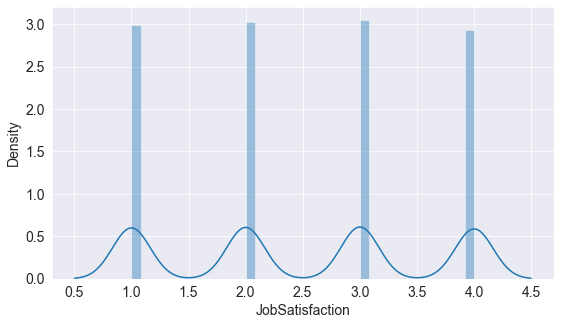

In [19]:
s.distplot(df['JobSatisfaction'])

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

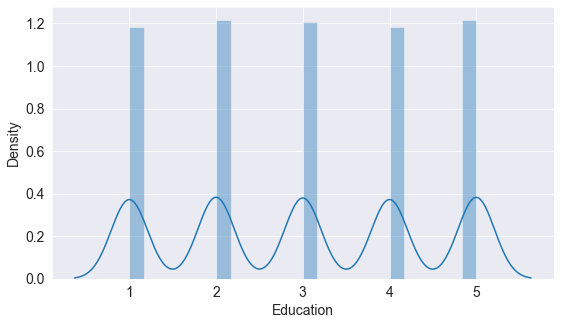

In [20]:
s.distplot(df['Education'])

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

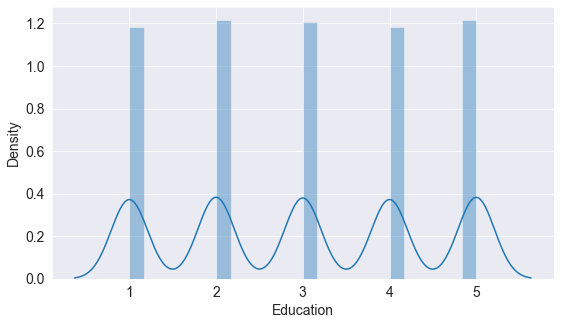

In [21]:
s.distplot(df["Education"])

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

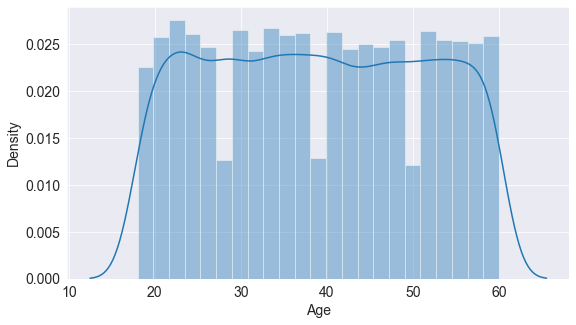

In [22]:
s.distplot(df["Age"])


c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

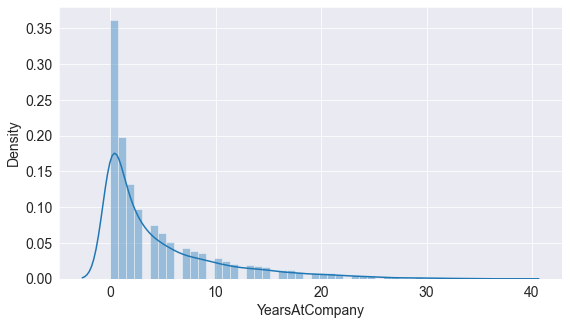

In [23]:
s.distplot(df['YearsAtCompany'])

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Job Involvement vs IsIndividualContributor'}, xlabel='IsIndividualContributor', ylabel='JobInvolvement'>

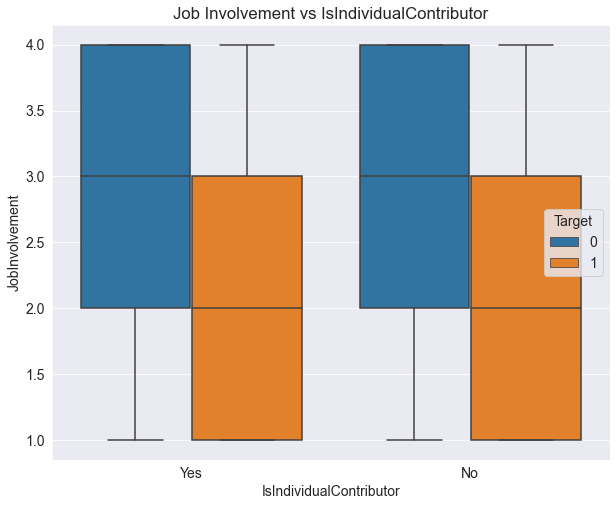

In [24]:
m.figure(figsize=(10,8))
m.title('Job Involvement vs IsIndividualContributor')
s.boxplot(train_raw.IsIndividualContributor, train_raw.JobInvolvement, hue=train_raw.Target)

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

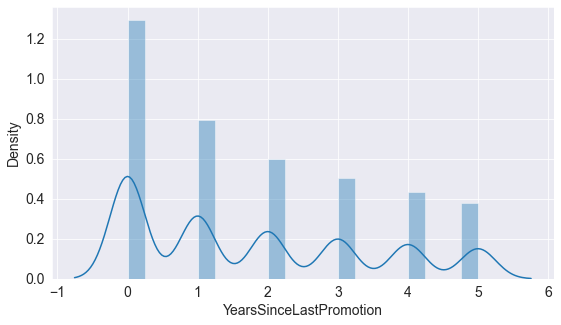

In [25]:
s.distplot(df['YearsSinceLastPromotion'])

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

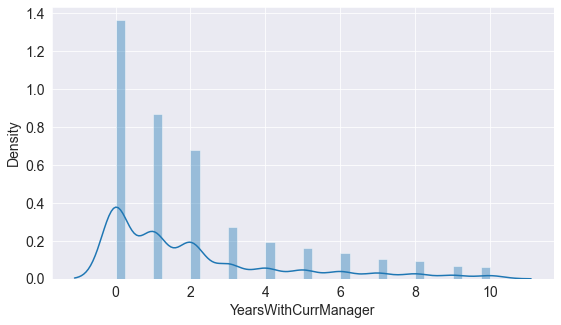

In [26]:
s.distplot(df['YearsWithCurrManager'])

In [27]:
df.columns.value_counts()

IsIndividualContributor     1
HasFlexibleTimings          1
RemoteWorkSatistfaction     1
WorkLifeBalance             1
PercentSalaryHike           1
Department                  1
EmployeeID                  1
NumCompaniesWorked          1
JobRole                     1
AvgDailyHours               1
SelfMotivationLevel         1
MonthlyIncome               1
YearsSinceLastPromotion     1
JobSatisfaction             1
MaritalStatus               1
WorkLoadLevel               1
PerformanceRating           1
RelationshipSatisfaction    1
JobInvolvement              1
YearsWithCurrManager        1
EducationField              1
YearsAtCompany              1
Target                      1
MicromanagedAtWork          1
TrainingTimesLastYear       1
Education                   1
Age                         1
TotalWorkingYears           1
LeavesTaken                 1
Gender                      1
dtype: int64

In [28]:
def Data_Processor(temp_frame):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp = p.DataFrame()
    temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings']) 
    temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor']) 
    temp_frame['RemoteWorkSatistfaction']= label_encoder.fit_transform(temp_frame['RemoteWorkSatistfaction']) 
    temp_frame['WorkLoadLevel']= label_encoder.fit_transform(temp_frame['WorkLoadLevel']) 
    temp = p.concat([p.get_dummies(temp_frame[col]) for col in ['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']], axis=1)
    temp.groupby(level=0, axis=1).sum()
    temp_frame = p.concat([temp_frame, temp], axis=1)
    temp_frame.drop(['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'EmployeeID'], axis=1, inplace=True)

    return temp_frame

In [29]:
def Normalize(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    frame = p.DataFrame()
    frame = df
    frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]);
    return frame

In [30]:
df = Data_Processor(df)


c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [31]:
df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,36.0,6.45,5,0,1,1,2,7.0,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,24.0,8.48,5,0,1,1,4,9.0,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,45.0,6.93,2,0,1,3,4,24.0,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,30.0,7.30,3,0,1,2,4,9.0,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,31.0,10.78,2,1,1,4,4,11.0,3.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,24.0,7.32,2,0,0,4,4,18.0,1.0,...,0,0,1,0,0,0,0,0,1,0
15996,0,56.0,7.60,2,0,0,2,3,14.0,2.0,...,0,0,0,0,0,1,0,0,0,1
15997,0,26.0,6.52,1,0,1,4,4,7.0,2.0,...,0,0,0,0,1,0,0,0,0,1
15998,0,29.0,6.11,4,1,0,4,2,8.0,2.0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
norm_df=Normalize(df)
norm_df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,-0.242771,-0.727341,5,0,1,1,2,-0.606832,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,-1.212807,0.390193,5,0,1,1,4,-0.297836,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0.484755,-0.463096,2,0,1,3,4,2.019630,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,-0.727789,-0.259408,3,0,1,2,4,-0.297836,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,-0.646953,1.656365,2,1,1,4,4,0.011159,3.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,-1.212807,-0.248398,2,0,0,4,4,1.092644,1.0,...,0,0,1,0,0,0,0,0,1,0
15996,0,1.373954,-0.094255,2,0,0,2,3,0.474653,2.0,...,0,0,0,0,0,1,0,0,0,1
15997,0,-1.051134,-0.688805,1,0,1,4,4,-0.606832,2.0,...,0,0,0,0,1,0,0,0,0,1
15998,0,-0.808625,-0.914514,4,1,0,4,2,-0.452334,2.0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

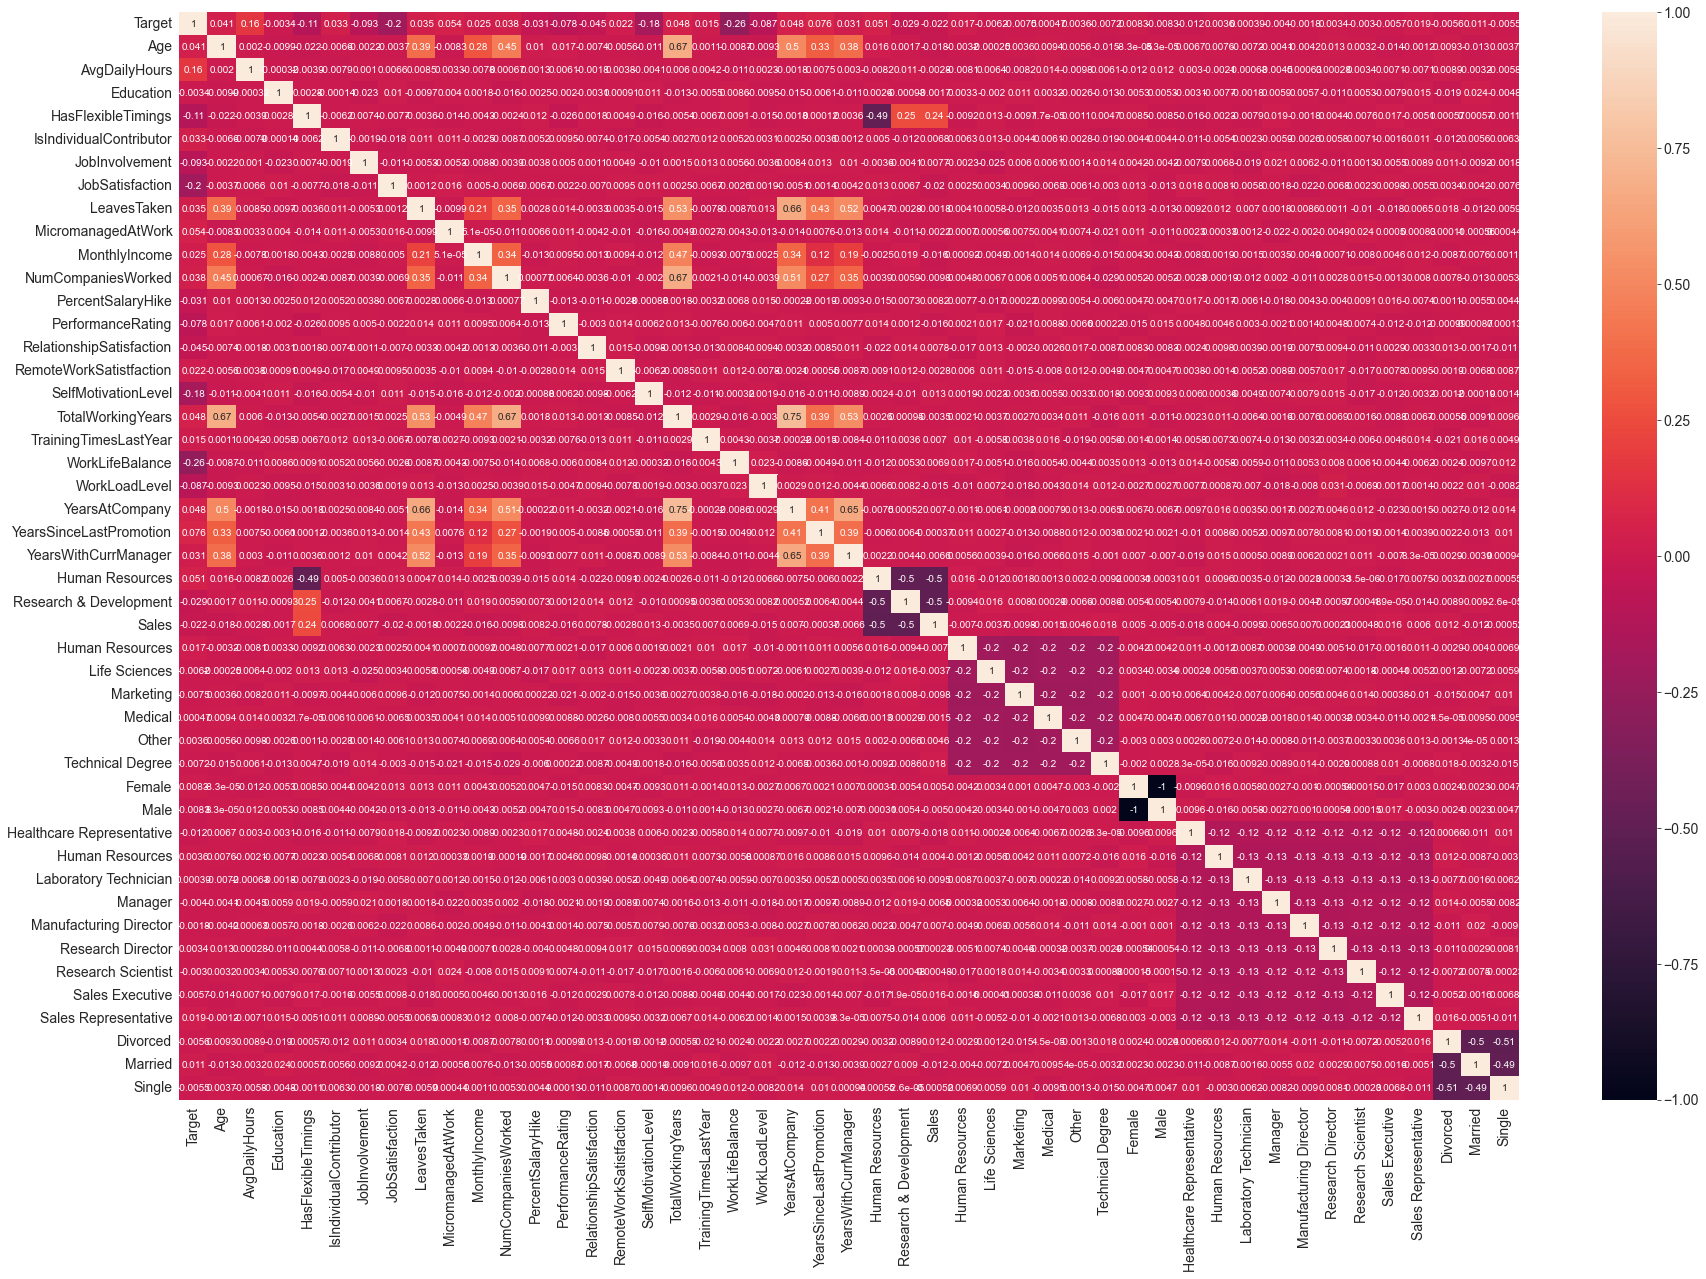

In [38]:
m.figure(figsize=(30,20))
s.heatmap(norm_df.corr(),annot=True, annot_kws={"fontsize":10})

In [39]:
norm_df.columns

Index(['Target', 'Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single'],
      dtype='object')

In [45]:
X = norm_df[['Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]

y = norm_df['Target']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=40)
print("Train set: ",X_train.shape, y_train.shape)
print("Test set: ",X_test.shape, y_test.shape)

Train set:  (10843, 52) (10843,)
Test set:  (2711, 52) (2711,)


# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic=LogisticRegression(C=0.01, solver="liblinear")
logistic.fit(X_train,y_train)
logistic

LogisticRegression(C=0.01, solver='liblinear')

In [49]:
yhatlr = logistic.predict(X_test)
yhatlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)


# import Error


In [65]:
"""from sklearn.metrics import jaccard_score
#jaccard_score=(y_test, yhatlr,PAIDOFF)
jaccard_score(y_test, yhatlr,pos_label = "PAID_OFF")"""

NameError: name 'PAIDOFF' is not defined

In [53]:
log_loss(y_test, yhatlr)

5.325425792182166

In [54]:
#log_grid_srch.fit(X_train, y_train)

In [57]:
logistic_best_parameters = log_grid_srch.best_params_
print(logistic_best_parameters)

NameError: name 'log_grid_srch' is not defined

In [56]:
"""logistic_best_result = log_grid_srch.best_score_
print('Accuracy of Logistic Regression: ', logistic_best_result)"""

"logistic_best_result = log_grid_srch.best_score_\nprint('Accuracy of Logistic Regression: ', logistic_best_result)"

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=8)


In [43]:
dtree.fit(X_train, y_train)
yhattr = dtree.predict(X_test)

In [44]:
print("Accuracy of Decision Tree: ",accuracy_score(y_test, yhattr))

Accuracy of Decision Tree:  0.8550350424197714


In [45]:
dec_tree_grid_param = {'criterion': ['gini', 'entropy'], 'max_depth':[ 6.8, 6.9, 7,7.1, 7.2, 7.3, 7.4, 7.5]}

dec_tree_grd_srch = GridSearchCV(estimator=dtree, param_grid=dec_tree_grid_param, scoring='accuracy', 
                            n_jobs=-1)

In [46]:
dec_tree_grd_srch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6.8, 6.9, 7, 7.1, 7.2, 7.3, 7.4, 7.5]},
             scoring='accuracy')

In [47]:
dec_tree_best_params = dec_tree_grd_srch.best_params_
print(dec_tree_best_params)

{'criterion': 'gini', 'max_depth': 6.8}


In [48]:
dec_tree_best_result = dec_tree_grd_srch.best_score_
print(dec_tree_best_result)

0.8671953763106096


# SVM

In [49]:
from sklearn import svm
svm_clf = svm.SVC(C= 0.5, kernel='rbf')
svm_clf.fit(X_train, y_train) 

SVC(C=0.5)

In [50]:
yhatsvm = svm_clf.predict(X_test)
print(classification_report(y_test, yhatsvm))
print("Accuracy of SVM: ",accuracy_score(y_test, yhatsvm))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2194
           1       0.95      0.23      0.37       517

    accuracy                           0.85      2711
   macro avg       0.90      0.61      0.64      2711
weighted avg       0.87      0.85      0.81      2711

Accuracy of SVM:  0.850977499077831


In [51]:
svm_grid_param = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                  'kernel':['rbf', 'linear', 'poly', 'sigmoid']}

svm_grd_srch = GridSearchCV(estimator=svm_clf, param_grid=svm_grid_param, scoring='accuracy', 
                            n_jobs=-1)

In [52]:
"""svm_grd_srch.fit(X_train, y_train)"""

'svm_grd_srch.fit(X_train, y_train)'

In [53]:
"""svm_best_params = svm_grd_srch.best_params_
print(svm_best_params)"""

'svm_best_params = svm_grd_srch.best_params_\nprint(svm_best_params)'

In [54]:
"""svm_best_result = svm_grd_srch.best_score_
print(svm_best_result)"""

'svm_best_result = svm_grd_srch.best_score_\nprint(svm_best_result)'

# K - Nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
import numpy as n
ks = 10
error_rate = []

# Will take some time
for i in range(1,ks):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yhatknn = knn.predict(X_test)
    error_rate.append(n.mean(yhatknn != y_test))

Text(0, 0.5, 'Error Rate')

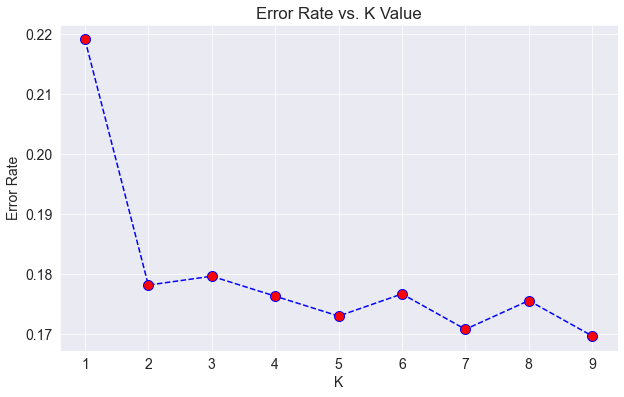

In [58]:
m.figure(figsize=(10,6))
m.plot(range(1,ks),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
m.title('Error Rate vs. K Value')
m.xlabel('K')
m.ylabel('Error Rate')

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yhatknn = knn.predict(X_test)

In [60]:
print("Accuracy of KNN: ", accuracy_score(y_test, yhatknn))

Accuracy of KNN:  0.8270011066027296


# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rndm_frst = RandomForestClassifier(n_estimators=300, random_state=10)

In [63]:
rndm_frst.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=10)

In [64]:
yhatrf = rndm_frst.predict(X_test)

In [65]:
print("Accuracy of Random Forest: ", accuracy_score(y_test, yhatrf))

Accuracy of Random Forest:  0.8605680560678717


In [66]:
rndm_frst_grid_param = {
    'n_estimators': [900, 925, 950, 975, 1000],
    'criterion': ['gini', 'entropy']}

rndm_frst_grd_srch = GridSearchCV(estimator=rndm_frst,
                     param_grid=rndm_frst_grid_param,
                     scoring='accuracy', n_jobs=-1)

In [67]:
"""rndm_frst_grd_srch.fit(X_train, y_train)"""

'rndm_frst_grd_srch.fit(X_train, y_train)'

In [68]:
"""rndm_frst_best_params = rndm_frst_grd_srch.best_params_
print(rndm_frst_best_params)"""

'rndm_frst_best_params = rndm_frst_grd_srch.best_params_\nprint(rndm_frst_best_params)'

In [69]:
"""rndm_frst_best_result = rndm_frst_grd_srch.best_score_
print(rndm_frst_best_result)"""

'rndm_frst_best_result = rndm_frst_grd_srch.best_score_\nprint(rndm_frst_best_result)'


# Feature Selection

# Logistic Regression 

In [70]:
# Using the Recursive Feature Selection, a type of wrapper feature selection method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
lr_model = LogisticRegression()
rfe = RFE(lr_model, 30)
fit_lr_30 = rfe.fit(X, y)

print("Num Features: %s" % (fit_lr_30.n_features_))
print("Selected Features: %s" % (fit_lr_30.support_))
print("Feature Ranking: %s" % (fit_lr_30.ranking_))

feat_30_lr_mask = fit_lr_30.support_

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: Conv

c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vega ramesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

Num Features: 30
Selected Features: [False  True False  True  True  True  True  True  True False False  True
  True  True  True  True  True False  True  True  True  True False False
  True False False False False  True  True False False  True  True False
  True False  True False  True False False False  True  True  True False
  True False  True False]
Feature Ranking: [18  1 21  1  1  1  1  1  1 20 12  1  1  1  1  1  1  7  1  1  1  1  5 15
  1 19 14 16 13  1  1 17 22  1  1  4  1  3  1  6  1 11  2 23  1  1  1 10
  1  9  1  8]


In [72]:
selected_30_feat_lr = []
selected_30_feat_lr = n.array(X.columns)[feat_30_lr_mask]
X_selected_lr = norm_df[selected_30_feat_lr]

In [73]:
X_selected_lr.shape, selected_30_feat_lr

((13554, 38),
 array(['AvgDailyHours', 'HasFlexibleTimings', 'IsIndividualContributor',
        'JobInvolvement', 'JobSatisfaction', 'LeavesTaken',
        'MicromanagedAtWork', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
        'SelfMotivationLevel', 'TotalWorkingYears', 'WorkLifeBalance',
        'WorkLoadLevel', 'YearsAtCompany', 'YearsSinceLastPromotion',
        'Human Resources', 'Human Resources', 'Human Resources', 'Medical',
        'Other', 'Female', 'Healthcare Representative', 'Human Resources',
        'Manufacturing Director', 'Research Director',
        'Research Scientist', 'Sales Representative', 'Married'],
       dtype=object))

In [74]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X_selected_lr, y, test_size=0.2, random_state=40)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (10843, 38) (10843,)
Test set: (2711, 38) (2711,)


# Logistic Regression2

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic2 = LogisticRegression(C=0.67, solver='saga')
logistic2.fit(X_train2,y_train2)
logistic2

LogisticRegression(C=0.67, solver='saga')

In [76]:
yhatlr2 = logistic2.predict(X_test2)
print('Accuracy of Logistic Regreseeion on selected features: ', accuracy_score(y_test2, yhatlr2))

Accuracy of Logistic Regreseeion on selected features:  0.8727406860936924


In [77]:
log_grid_param2 = {'C': [0.7, 0.72, 0.75, 0.77, 0.8,],
                 'solver':['liblinear', 'sag', 'saga']}

In [78]:
log_grid_srch2 = GridSearchCV(estimator=logistic2, param_grid=log_grid_param2, scoring='accuracy', 
                            n_jobs=-1)

In [79]:
log_grid_srch2.fit(X_train2, y_train2)

GridSearchCV(estimator=LogisticRegression(C=0.67, solver='saga'), n_jobs=-1,
             param_grid={'C': [0.7, 0.72, 0.75, 0.77, 0.8],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [80]:
logistic_best_parameters2 = log_grid_srch2.best_params_
print(logistic_best_parameters2)

{'C': 0.7, 'solver': 'sag'}


In [81]:
logistic_best_result2 = log_grid_srch2.best_score_
print(logistic_best_result2)

0.8774315284646622


# Random Forest2 (on selected features)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rndm_frst2 = RandomForestClassifier(n_estimators=950, random_state=10)
# 'gini' is already the default criterion

In [84]:
rndm_frst2.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=950, random_state=10)

In [85]:
yhatrf2 = rndm_frst2.predict(X_test2)
print("Accuracy of Random Forest on selected features: ", accuracy_score(y_test2, yhatrf2))

Accuracy of Random Forest on selected features:  0.8690520103282922


In [86]:
rndm_frst_grid_param2 = {
    'n_estimators': [900, 925, 950, 975, 1000],
    'criterion': ['gini', 'entropy']}

rndm_frst_grd_srch2 = GridSearchCV(estimator=rndm_frst2,
                     param_grid=rndm_frst_grid_param2,
                     scoring='accuracy', n_jobs=-1)

In [87]:
"""rndm_frst_grd_srch2.fit(X_train2, y_train2)"""

'rndm_frst_grd_srch2.fit(X_train2, y_train2)'

In [88]:
rndm_frst_best_params2 = rndm_frst_grd_srch2.best_params_
print(rndm_frst_best_params2)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [92]:
rndm_frst_best_result2 = rndm_frst_grd_srch2.best_score_
print(rndm_frst_best_result2)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

# SVM2

In [93]:
from sklearn import svm
svm_clf2 = svm.SVC(C= 0.8, kernel='linear')

svm_clf2.fit(X_train2, y_train2)

SVC(C=0.8, kernel='linear')

In [94]:
yhatsvm2 = svm_clf2.predict(X_test2)
print("Accuracy of SVM on selected features: ",accuracy_score(y_test2, yhatsvm2))

Accuracy of SVM on selected features:  0.866469937292512


In [95]:
svm_grid_param2 = {'C':[4.8, 5.0, 5.2],
                  'kernel':['linear', 'poly', 'sigmoid']}

svm_grd_srch2 = GridSearchCV(estimator=svm_clf2, param_grid=svm_grid_param2, scoring='accuracy', 
                            n_jobs=-1)

In [96]:
svm_grd_srch2.fit(X_train2, y_train2)

GridSearchCV(estimator=SVC(C=0.8, kernel='linear'), n_jobs=-1,
             param_grid={'C': [4.8, 5.0, 5.2],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [97]:
svm_best_params2 = svm_grd_srch2.best_params_
print(svm_best_params2)

{'C': 5.0, 'kernel': 'linear'}


In [98]:
svm_best_result2 = svm_grd_srch2.best_score_
print('Accuracy of SVM: ', svm_best_result2)

Accuracy of SVM:  0.8720831865995008


| Column 1 | Column 2 |
|----------|----------|
| Value 1  | Value 2  |


$E = mc^2$
$$\frac{1}{2} \cdot x = 5$$


This is `inline code`.

```python
print("This is a code block.")


> This is a blockquote.

![Jupyter Logo](https://jupyter.org/assets/nav_logo.svg)

[Visit Google](https://www.google.com)


1. Item 1
2. Item 2

* Unordered Item 1
* Unordered Item 2


*italic*
_italic_

**bold**
__bold__


# Heading 1
## Heading 2
### Heading 3


Inline equation: $y = mx + b$

Displayed equation:
$$\int_{0}^{1} x^2 \, dx$$


    def greeting(name):
        print(f"Hello, {name}!")


~~This text is strikethrough.~~


H2O is a chemical formula with H^2^O.
CO~2~ is carbon dioxide.


This is the first line.  
This is the second line.


####😎

- [ ] Task 1
- [x] Task 2 (completed)


This is a sentence with a footnote[^1].

[^1]: This is the footnote text.


In [ ]:
<div style="background-color: lightblue;">This is a div with a light blue background.</div>
